# Indicadores de Qualidade

## 00. Declarando Bibliotecas

In [1]:
import pandas as pd 
import os
import datetime
import matplotlib.pyplot as plt
import controller #Arquivo com o código fonte de todos as funções desenvolvidas pela equipe

## 1. Criação de dataframes e adaptação

#### 1.1 Criando os dataframes das bases de dados em Excel

In [2]:
modalidade = pd.read_excel('../dados/STG_MDL.xlsx')
pagamento = pd.read_excel('../dados/STG_PGT.xlsx')
movimento = pd.read_excel('../dados/STG_MVT_CRD.xlsx')
operacao = pd.read_excel('../dados/STG_OPR_ITT.xlsx')
fonte = pd.read_excel('../dados/STG_FNT_ITT.xlsx')

#### 1.2 Aplicando padrão de nome de colunas estabelecido pela equipe, apenas para etapa de manipulação

In [3]:
modalidade.columns = ['id_mod', 'codigo_mod', 'descri_mod', 'DAT_INC_DBO']
pagamento.columns = ['id_pagamento', 'vlr_pago', 'data_vencimento', 'codigo_mod', 'qtd_clientes', 'qtd_pagamento', 'id_fonte', 'tipo_pessoa', 'DAT_RSS_FNT_ITT', 'DAT_INC_DBO']
movimento.columns = ['id_movi', 'vlr_saldo', 'vlr_total_fat', 'vlr_min_fat', 'vlr_parcela_fat', 'qtd_clientes', 'qtd_movi', 'tipo_pessoa', 'id_fonte', 'codigo_mod', 'DAT_RSS_FNT_ITT', 'DAT_INC_DBO']
operacao.columns = ['id_operacao', 'vlr_contrato', 'qtd_parcelas', 'vlr_pendente', 'qtd_clientes', 'qtd_operacao', 'id_fonte', 'codigo_mod', 'tipo_pessoa', 'DAT_RSS_FNT_ITT', 'DAT_INC_DBO']
fonte.columns = ['id_fonte', 'cnpj', 'complemento', 'NOM_COM', 'NOM_RAZ_SCL', 'DAT_INC_DBO']

O nome das colunas foi alterado para deixar o código mais legível durante seu desenvolvimento.
Abaixo está disponível uma tabela de referência entre o nome original e o utilizado durante o desenvolvimento do projeto.

In [4]:
pd.read_csv('../padronização/padrao_colunas.csv', sep = ';')

,Nome original,Nome utilizado,Tabela
0,ID_STG_FNT_ITT,id_fonte,fonte
1,NUM_CNPJ,cnpj,fonte
2,NUM_CMP_CNPJ,complemento,fonte
3,ID_STG_MDL,id_mod,modalidade
4,COD_MDL,codigo_mod,modalidade
5,DES_MDL,descri_mod,modalidade
6,ID_STG_MVT_CRD,id_movi,movimentacao
7,VLR_SDO_UTZ_CRD_RTO,vlr_saldo,movimentacao
8,VLR_TOT_FAT,vlr_total_fat,movimentacao
9,VLR_MIM_FAT,vlr_min_fat,movimentacao


#### 1.3 Criando o atributo .nome para facilitar a exibição das tabelas nas respectivas funções

In [5]:
fonte.nome = 'Fonte'
movimento.nome = 'Movimentações'
operacao.nome = 'Operações'
pagamento.nome = 'Pagamento'
modalidade.nome = 'Modalidade'

## 2. Apresentação da situação atual dos dados

In [6]:
fonte.head()

,id_fonte,cnpj,complemento,NOM_COM,NOM_RAZ_SCL,DAT_INC_DBO
0,137,2427884087,2805,NMN,NMN,2019-12-19 13:43:41.914
1,183,12182674487,2635,NMN,NMN,2019-12-19 13:43:41.914
2,197,16167328168,1802,NMN,NMN,2019-12-19 13:43:41.914
3,267,279925978,2329,NMN,NMN,2019-12-19 13:43:41.914
4,322,20579036860,2397,NMN,NMN,2019-12-19 13:43:41.914


In [7]:
modalidade.head()

,id_mod,codigo_mod,descri_mod,DAT_INC_DBO
0,17,E02,ADIANTAMENTO DEPOSITANTE,2019-12-19 13:37:34.759
1,13,B99,OUTROS FINANCIAMENTOS,2019-12-19 13:37:34.759
2,15,D01,CARTAO DE CREDITO,2019-12-19 13:37:34.759
3,19,G01,TITULOS DESCONTADOS,2019-12-19 13:37:34.759
4,2,A02,EMPRESTIMO - CAPITAL DE GIRO,2019-12-19 13:37:34.759


In [8]:
movimento.head()

,id_movi,vlr_saldo,vlr_total_fat,vlr_min_fat,vlr_parcela_fat,qtd_clientes,qtd_movi,tipo_pessoa,id_fonte,codigo_mod,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,1,NaN,NaN,NaN,4.595517e+10,37186,677272,F,67,C01,2020-01-16,2020-01-17 17:49:17.524
1,2,NaN,NaN,NaN,7.387237e+10,307070,2741111,F,67,B99,2020-01-16,2020-01-17 17:49:17.524
2,3,NaN,NaN,NaN,2.868181e+09,601,1964,F,67,B01,2020-01-16,2020-01-17 17:49:17.524
3,4,NaN,NaN,NaN,6.111251e+10,18820,244041,F,67,B03,2020-01-16,2020-01-17 17:49:17.524
4,5,NaN,NaN,NaN,2.152609e+06,2,4,F,67,F01,2020-01-16,2020-01-17 17:49:17.524


In [9]:
operacao.head()

,id_operacao,vlr_contrato,qtd_parcelas,vlr_pendente,qtd_clientes,qtd_operacao,id_fonte,codigo_mod,tipo_pessoa,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,1,NaN,45,NaN,341,358,67,A04,F,2020-01-16,2020-01-27 10:49:48.15
1,2,NaN,63,NaN,103,108,67,B99,F,2020-01-16,2020-01-27 10:49:48.15
2,3,NaN,22,NaN,15,16,67,B05,F,2020-01-16,2020-01-27 10:49:48.15
3,4,NaN,48,NaN,9,9,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
4,5,NaN,290,NaN,3,3,67,B03,F,2020-01-16,2020-01-27 10:49:48.15


In [10]:
pagamento.head()

,id_pagamento,vlr_pago,data_vencimento,codigo_mod,qtd_clientes,qtd_pagamento,id_fonte,tipo_pessoa,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,451,515711,16082022,A04,22,22,67,F,2020-01-16,2020-01-17 17:50:42.746
1,452,60763,26102020,A99,2,2,67,F,2020-01-16,2020-01-17 17:50:42.746
2,453,8588195,24022019,G01,22,22,67,F,2020-01-16,2020-01-17 17:50:42.746
3,454,369084,24062018,B99,16,23,67,F,2020-01-16,2020-01-17 17:50:42.746
4,455,13054,20022021,B99,1,1,67,F,2020-01-16,2020-01-17 17:50:42.746


## 3. Funções para análise e geração dos indicadores

Nosso projeto foi dividido em funções para análise e tratamento dos dados. Cada uma das funções definidas e desenvolvidas pela equipe possui uma funcionalidade diferente, que pode ser aplicada para uma ou mais base de dados analisadas. 

Estas funções podem exibir conclusões sobre a base de dados em estudo, como identificar e contabilizar os campos que não estão preenchidos corretamente, ou realizar alterações na base de dados, formatando os valores para melhor visualização destes. Todos os casos serão explicados abaixo.

O capítulo 3, em seus subitens, explicará todas as funções desenvolvidas pela equipe.

#### 3.1 Primeira função: ocultar todos os campos nulos que não afetam a integridade da base de dados, conforme regras de negócio. (Caso especifico para as tabelas movimento e operação). 
A tabela de operações exibe diversos itens que não possuem os campos vlr_pendente e vlr_saldo preenchidos. Analisando a base de dados, foi possível observar que estes campos se aplicam apenas à operações da modalidade C01. 

Portanto, campos nulos em operações de outra modalidade não são um problema de integridade ou completude da base de dados.

Ponderando que, na análise abaixo, dividimos a função em dois dataframes para facilitar a análise, sendo um dataframe somente COM a modalidade C01 e outro dataframe SEM a modalidade C01. 

Separamos o dataframe em duas partes pois para análisar a modalidade C01, precisamos de condições especificas, como a necessidade das colunas "vlr_contrato" e "vlr_pendente". Os valores nulos nas colunas "vlr_contrato" e "vlr_pendente" só existem quando não há o atributo da modalidade "C01". Os valores nulos que existem não prejudicam a integridade das informações, mas para melhor apresentação em análise, eles foram ocultados. 

##### 3.1.1 Sem a modalidade "CO1" - Tabela 'Operação'

Definindo a característica específica (Dataframe SEM o C01) do Dataframe

In [11]:
id_sem_C01 = operacao[(operacao['codigo_mod'] != 'C01')]

Criando o dataframe com as caracteristicas especificas e utilizando as colunas necessárias para a análise

In [12]:
df_sem_C01 = pd.DataFrame(id_sem_C01, columns = ['id_operacao', 'qtd_parcelas', 'qtd_clientes', 'qtd_operacao', 'id_fonte', 'codigo_mod', 'tipo_pessoa', 'DAT_RSS_FNT_ITT', 'DAT_INC_DBO'])

Aqui podemos ver o primeiro dataframe, com as operações da modalidade C01.

In [13]:
df_sem_C01.head()

,id_operacao,qtd_parcelas,qtd_clientes,qtd_operacao,id_fonte,codigo_mod,tipo_pessoa,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,1,45,341,358,67,A04,F,2020-01-16,2020-01-27 10:49:48.15
1,2,63,103,108,67,B99,F,2020-01-16,2020-01-27 10:49:48.15
2,3,22,15,16,67,B05,F,2020-01-16,2020-01-27 10:49:48.15
3,4,48,9,9,67,B03,F,2020-01-16,2020-01-27 10:49:48.15
4,5,290,3,3,67,B03,F,2020-01-16,2020-01-27 10:49:48.15


E aqui aplicamos um método de contabilização dos valores núlos. Ou seja, nenhum dos valores que deveria estar preenchido se encontra nulo. O que mostra uma completude de 100%.

In [14]:
df_sem_C01.isnull().sum()

id_operacao        0
qtd_parcelas       0
qtd_clientes       0
qtd_operacao       0
id_fonte           0
codigo_mod         0
tipo_pessoa        0
DAT_RSS_FNT_ITT    0
DAT_INC_DBO        0
dtype: int64

In [15]:
pd.DataFrame(df_sem_C01['codigo_mod'].value_counts()) #trazendo ID e suas modalidades

,codigo_mod
B03,214
A01,122
A04,112
B99,104
B05,71
A99,35
A05,20
B01,19
B06,4
B07,2


##### 3.1.2 Com a modalidade "C01" - Tabela 'Operação'

Definindo as caracteristicas especificas (Dataframe COM o C01) do dataframe

In [16]:
id_mod_C01 = operacao[(operacao['codigo_mod'] == 'C01')]

Criando o dataframe com as caracteristicas especificas e com todas as colunas

In [17]:
df_com_C01 = pd.DataFrame(id_mod_C01)
df_com_C01.head()

,id_operacao,vlr_contrato,qtd_parcelas,vlr_pendente,qtd_clientes,qtd_operacao,id_fonte,codigo_mod,tipo_pessoa,DAT_RSS_FNT_ITT,DAT_INC_DBO
6,7,24231168.0,20,14774641.0,6,7,67,C01,F,2020-01-16,2020-01-27 10:49:48.15
14,15,83720000.0,158,61146076.0,4,4,67,C01,F,2020-01-16,2020-01-27 10:49:48.15
18,19,453409414.0,82,345569291.0,86,93,67,C01,F,2020-01-16,2020-01-27 10:49:48.15
19,20,831887355.0,70,387293236.0,150,171,67,C01,F,2020-01-16,2020-01-27 10:49:48.15
22,23,168720000.0,117,47151818.0,10,10,67,C01,F,2020-01-16,2020-01-27 10:49:48.15


Agora, com o segundo DataFrame derivado da tabela de operações criado, aplicaremos o método de contabilização de valores núlos.

In [18]:
df_com_C01.isnull().sum()

id_operacao        0
vlr_contrato       0
qtd_parcelas       0
vlr_pendente       0
qtd_clientes       0
qtd_operacao       0
id_fonte           0
codigo_mod         0
tipo_pessoa        0
DAT_RSS_FNT_ITT    0
DAT_INC_DBO        0
dtype: int64

In [19]:
df_com_C01.count()

id_operacao        186
vlr_contrato       186
qtd_parcelas       186
vlr_pendente       186
qtd_clientes       186
qtd_operacao       186
id_fonte           186
codigo_mod         186
tipo_pessoa        186
DAT_RSS_FNT_ITT    186
DAT_INC_DBO        186
dtype: int64

Ou seja, a completude da tabela de operações está em 100%.

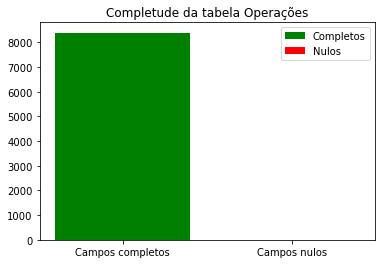

In [20]:
controller.plot_completude(operacao)

##### 3.2 Verifica na Tabela fonte se o Nome Comercial e Razão Social são Strings


In [21]:
controller.checar_string(fonte)

Foram identificados 0 dados incoerentes na coluna Nome Comercial 
e na coluna Nome Razão Social foram identificados 0 dados incoerentes


#### 3.2 Validação de CNPJs
Nessa função o objetivo é você validar todos os CNPJ's, verificando os numeros de digitos

A tabela de fontes possui um total de 1008 CNPJ's.
433 destes possuem tamanho de dígitos válidos e 575 inválidos.


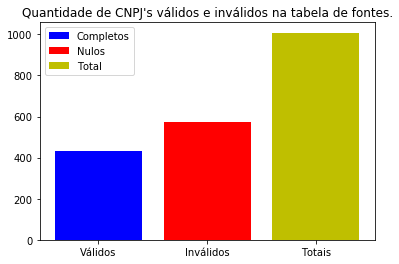

In [22]:
controller.valida_cnpj()

#### 3.3 Validação IDs
Nesta função, temos o objetivo de identificar se os ID's possuem continuidade, e indentificar os ID's que estão faltando.

Exemplo:
(1,2,3,5,7,8,9)

Estão faltando os ID's 4 e 6.

In [23]:
controller.gap_id(fonte)
controller.gap_id(operacao)
controller.gap_id(modalidade)
controller.gap_id(pagamento)
controller.gap_id(movimento)

Existe um gap de 1.687% na sequência de ID's da tabela Fonte
Abaixo a lista dos ID's faltantes:
 7, 8, 202, 612, 761, 762, 763, 764, 765, 803, 804, 805, 806, 807, 808, 809, 916

100% dos ID's da tabela Operações são sequenciais, pois não apresentam nenhum gap.
100% dos ID's da tabela Modalidade são sequenciais, pois não apresentam nenhum gap.
100% dos ID's da tabela Pagamento são sequenciais, pois não apresentam nenhum gap.
100% dos ID's da tabela Movimentações são sequenciais, pois não apresentam nenhum gap.


#### 3.4 Validação das modalidades nas tabelas

A função executada abaixo valida se os campos da coluna que exibem os códigos de modalidade são válidos. Ou seja, se realmente existem na tabela de modalidades. Esta função é válida para as tabelas de pagamentos, operações e movimentações.

A função exibe a porcentagem, assim como retorna um valor tipo float referente à porcentagem de valores faltantes. 
Caso o usuário deseje utilizar a função apenas para retornar o valor, poderá alterar o statement "exibir" para "False"

In [24]:
controller.valida_modalidade(movimento)
controller.valida_modalidade(operacao)
controller.valida_modalidade(pagamento)

100% dos códigos de modalidade da tabela de Movimentações estão referenciados na tabela de modalidade
100% dos códigos de modalidade da tabela de Operações estão referenciados na tabela de modalidade
100% dos códigos de modalidade da tabela de Pagamento estão referenciados na tabela de modalidade


0.0

#### 3.5 Formatando data de vencimento

Esta função, chamada de "formata_data_vencimento", foi criada pois uma das colunas estava com o padrão de data diferente dos demais. 
Ao chamar a função, ela ajusta o formato da tabela às demais.

In [25]:
controller.formata_data_vencimento(pagamento)

As datas da tabela Pagamento foram alteradas com sucesso


In [26]:
pagamento.head()

,id_pagamento,vlr_pago,data_vencimento,codigo_mod,qtd_clientes,qtd_pagamento,id_fonte,tipo_pessoa,DAT_RSS_FNT_ITT,DAT_INC_DBO
0,451,515711,16-08-2022,A04,22,22,67,F,2020-01-16,2020-01-17 17:50:42.746
1,452,60763,26-10-2020,A99,2,2,67,F,2020-01-16,2020-01-17 17:50:42.746
2,453,8588195,24-02-2019,G01,22,22,67,F,2020-01-16,2020-01-17 17:50:42.746
3,454,369084,24-06-2018,B99,16,23,67,F,2020-01-16,2020-01-17 17:50:42.746
4,455,13054,20-02-2021,B99,1,1,67,F,2020-01-16,2020-01-17 17:50:42.746


#### 3.6 Retornando data de criação do arquivo

O indicador de "recência" solicita verificações sobre a data de criação do arquivo e de sua última alteração.

Para realizar isso, utilizamos o módulo "os" que nos permite acessar atributos dos arquivos presentes no sistema operacional.
A função foi criada desenvolvida aceitando especificamente arquivos .xlsx, que é o formato das bases de dados recebidas.

Abaixo temos o exemplo aplicado para o arquivo STG_PGT.xlsx

In [27]:
controller.analisa_arquivo('../dados/STG_PGT.xlsx')

Data de criação do arquivo: 14/05/20 - 20h35
Data da última modificação do arquivo 14/02/20 - 17h44


#### 3.7 Validando se os ID's de fontes são válidos, utilizando como referência a tabela de fontes.

Esta próxima função valida se nos ID's existentes nas tabelas batem com os ID's informados na tabela de fonte.

A função "valida_idfonte" tem como argumento apenas o dataframe que deve ser analisado.

In [28]:
controller.valida_idfonte(operacao)
controller.valida_idfonte(movimento)
controller.valida_idfonte(pagamento)

100% dos ID's de fontes da tabela Operações são válidos, de acordo com a tabela de fontes
100% dos ID's de fontes da tabela Movimentações são válidos, de acordo com a tabela de fontes
100% dos ID's de fontes da tabela Pagamento são válidos, de acordo com a tabela de fontes
